In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import numpy as np
import pandas as pd

In [2]:
from pathlib import Path
import sys 
CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))
from src.utils.common.isotope import *
from parameters.parameters_materials import *
from src.utils.pre_processing.pre_processing import *

In [3]:
material = openmc.Materials([FUEL_UO2_MATERIAL, AIR_MATERIAL, PYC_EXTERNAL_MATERIAL, PYC_INTERNAL_MATERIAL, SIC_MATERIAL, WATER_MATERIAL])
material.export_to_xml()

In [4]:
RADIUS_FUEL = 0.025  # 250 microns in cm
THICKNESS_PYC_INTERNAL = 0.0065  # 65 microns in cm
THICKNESS_SIC = 0.00175  # 17.5 microns in cm

In [5]:
# 250 microns in cm
r_pin_fuel = openmc.Sphere(r=RADIUS_FUEL, boundary_type='vacuum')
pin_fuel_fuel_cell = openmc.Cell(fill=FUEL_UO2_MATERIAL, region=-r_pin_fuel)

r_pin_pyc = openmc.Sphere(r=RADIUS_FUEL + THICKNESS_PYC_INTERNAL, boundary_type='vacuum')
pin_fuel_pyc_cell = openmc.Cell(fill=PYC_INTERNAL_MATERIAL, region=-r_pin_pyc)

r_pin_sic = openmc.Sphere(r=RADIUS_FUEL + THICKNESS_PYC_INTERNAL + THICKNESS_SIC, boundary_type='vacuum')
pin_fuel_sic_cell = openmc.Cell(fill=SIC_MATERIAL, region=-r_pin_sic)


In [6]:
geometry = openmc.Geometry([pin_fuel_fuel_cell, pin_fuel_pyc_cell, pin_fuel_sic_cell])
geometry.export_to_xml()

 Reading materials XML file...
 Reading geometry XML file...
 Preparing distributed cell instances...
 Reading plot XML file...

 =======================>     PLOTTING SUMMARY     <========================

Plot ID: 1
Plot file: plot_openmc_xy.png
Universe depth: -1
Plot Type: Slice
Origin: 0 0 0
Width:  0.1  0.1
Coloring: Cells
Basis: XY
Pixels: 600 600

 Processing plot 1: plot_openmc_xy.png...


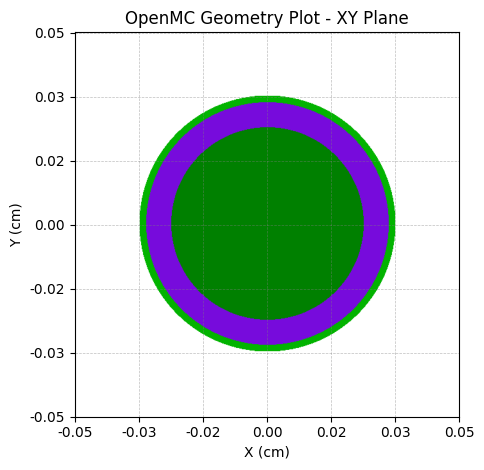

In [7]:
plot_geometry(materials = material, 
              plane="xy", width=0.1, 
              height=0.1, color_by="cell")
